# Heart Disease Data

I'm creating a project off of this youtube video (https://www.youtube.com/watch?v=bluclMxiUkA&t). I've worked with a decent amount of data, but never created a web app with flask. Github for this project can be found here (https://github.com/samkrall/model). 

This is purely me doing some basic data exploration then creating a regression model to be hosted on a webapp.

Most likely no one ever sees this work, but if you do, enjoy!


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


url = 'https://raw.githubusercontent.com/samkrall/model/main/data/data_file'

df = pd.read_csv(url, index_col = 0)

df.head()

,biking,smoking,heart.disease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224


## Data Exploration

I successfully imported my python packages. I read the csv from my github and looked at the top 5 rows of my database. Next I need to verify I don't have any NaN values and that my datatypes are all floats/ints.

In [37]:
df.shape

(498, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1 to 498
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 15.6 KB


In [40]:
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


## Data Exploration Continued...

Data looks great. No doubt the original author did most of the munging and manipulation. Clearly smoking is positively correlated with heart disease and biking (or any activity) is negatively correlated, but I want to verify visually...

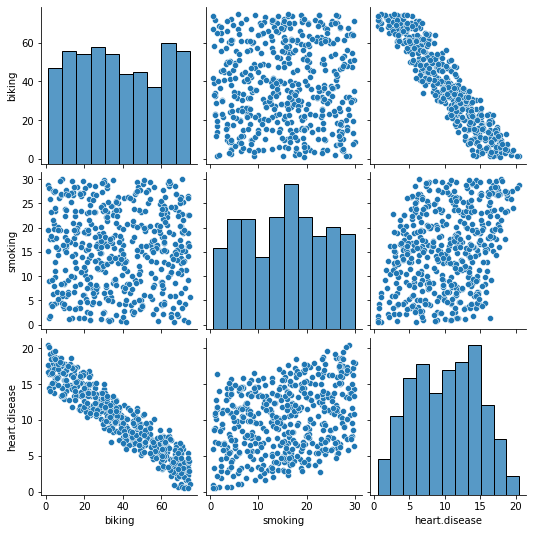

In [42]:
sns.pairplot(df, palette='Blues')

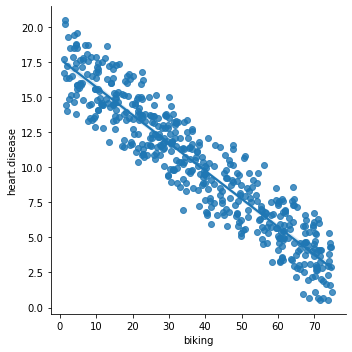

In [38]:
sns.lmplot(x='biking', y='heart.disease', data=df)

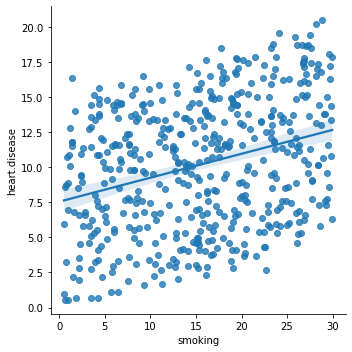

In [39]:
sns.lmplot(x='smoking', y='heart.disease', data=df)

In [43]:
df.corr()

,biking,smoking,heart.disease
biking,1.000000,0.015136,-0.935455
smoking,0.015136,1.000000,0.309131
heart.disease,-0.935455,0.309131,1.000000


In [44]:
df.skew()

biking           0.072903
smoking         -0.035892
heart.disease   -0.033439
dtype: float64

## Data Exploration Part III

Sure enough I have both visual representation of the relationships and numerical representation in my correlation.

## Data Munging and Model Building

The data is in great shape, the only thing I'm going to do is scale the data. Since there isn't much skew to the data this shouldn't matter too much, but its something I always like to do.

Ok time to build a model. I'm going to go with linear regression, the guy in the video went with it, but also from the data exploration there are linear relationships between heart disease rates and both smoking and biking. So I'm going to import from sklearn train test split and 

In [45]:
#function for scaling values, only applied to 

def scale_df(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column] / df_scaled[column].abs().max
    return(df_scaled)


## Model Building
I decided not to scale the data after bulding the function, but I'm leaving the function in...

Ok time to build a model. I'm going to go with linear regression, the guy in the video went with it, but also from the data exploration there are linear relationships between heart disease rates and both smoking and biking. So I'm going to import from sklearn train test split and the linear model, split the data into training and testing subsets, and fit my model

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df.drop('heart.disease', axis=1)
y = df['heart.disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 69)

my_model = linear_model.LinearRegression()

my_model.fit(X_train, y_train)

y_preds = my_model.predict(X_test)

print(my_model.score(X_train, y_train))
print(mean_squared_error(y_preds, y_test))

0.9813403091197823
0.44894956343498793


## Model Analysis

Mean squared error is looking great, the model is ready. Now I'm going to bring in pickle to store the model

In [57]:
import pickle
pickle.dump(my_model, open('model.pk1', 'wb'))

my_model = pickle.load(open('model.pk1', 'rb'))
print(my_model.predict([[70.1, 26.3]]))

[5.62503611]


## Conclusion

This is the end of the jupyter notebook. Code will be taken from this and applied to my model.